In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
import project_functions as pf
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#client_id: Every client's unique ID.
#variation: Indicates if a client was part of the experiment.
#visitor_id: A unique ID for each client-device combination.
#visit_id: A unique ID for each web visit/session.
#process_step: Marks each step in the digital process.
#date_time: Timestamp of each web activity.
#clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
#clnt_tenure_mnth: Further breaks down the client's tenure with Vanguard in months.
#clnt_age: Indicates the age of the client.
#gendr: Specifies the client's gender.
#num_accts: Denotes the number of accounts the client holds with Vanguard.
#bal: Gives the total balance spread across all accounts for a particular client.
#calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
#logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard's platform over the last six

In [3]:
fd_path = "df_final_demo.txt"
fe_path = "df_final_experiment_clients.txt"
fw1_path = "df_final_web_data_pt_1.txt"
fw2_path = "df_final_web_data_pt_2.txt"

In [4]:
fd_df = pd.read_csv(fd_path)
fe_df = pd.read_csv(fe_path)
fw1_df = pd.read_csv(fw1_path)
fw2_df = pd.read_csv(fw2_path)

In [5]:
fd_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
fd_df["client_id"].nunique()

70609

In [7]:
fe_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [8]:
fe_df["client_id"].nunique()

70609

In [9]:
fw1_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [10]:
fw2_df

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [11]:
#Here we join vertically both web data DF in order to work on them at the same time.
fw = pd.concat([fw1_df, fw2_df])

In [12]:
fw

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [13]:
fd = fd_df.merge(fe_df, how= "inner")

In [14]:
fd["client_id"].nunique()

70609

In [15]:
#Here, we're cleaning the columns.
pf.clean_columns(fd)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [16]:
fd.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [17]:
fd.dtypes

client_id            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
balance             float64
calls_6_mnth        float64
logons_6_mnth       float64
variation            object
dtype: object

In [18]:
fw.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [19]:
#Here we conver client_id to a string, because we consider it as categorical data.
#fw["client_id"] = fw["client_id"].astype(str)

In [20]:
#fw["date_time"] = pd.to_datetime(fw["date_time"])

In [21]:
pf.update_dtypes(fw)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [22]:
fw.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [23]:
fw.dtypes

client_id               object
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [24]:
fd.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [25]:
fd["variation"].isna().sum()

20109

In [26]:
fd["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [27]:
#We drop al null values for variation because they don't belong to a specific group.
pf.general_clean(fd)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [28]:
fd["variation"].isna().sum()

0

In [29]:
fd.shape

(50487, 10)

In [30]:
#Who are the primary clients using this online process?

In [31]:
fd["gendr"].value_counts()

gendr
U    17282
M    16947
F    16258
Name: count, dtype: int64

In [32]:
#Age of clients

In [33]:
fd["clnt_age"]

0        60.5
1        58.0
2        32.0
3        49.0
4        33.0
         ... 
50495    68.5
50496    68.5
50497    56.5
50498    69.5
50499    61.0
Name: clnt_age, Length: 50487, dtype: float64

<Axes: xlabel='clnt_age', ylabel='Count'>

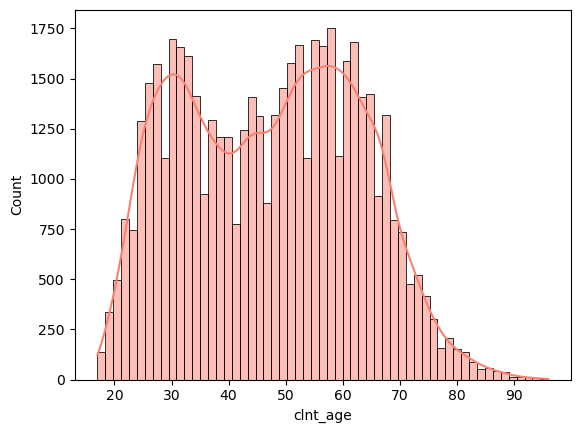

In [34]:
sns.histplot(fd['clnt_age'], kde=True, color="salmon")

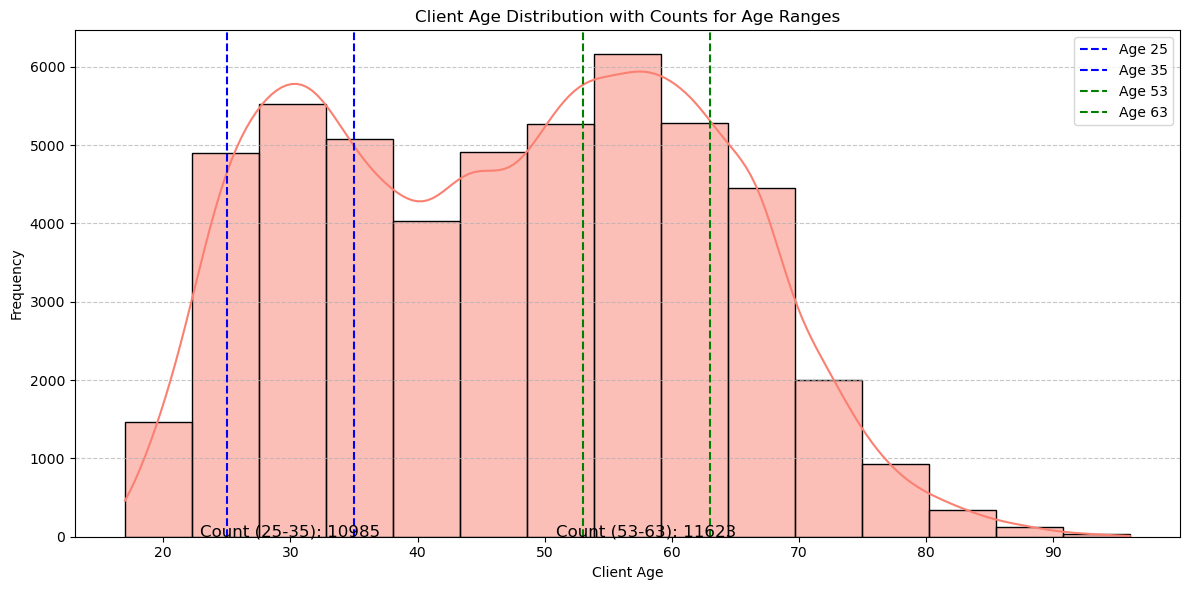

Number of people aged between 25 and 35: 10985
Number of people aged between 53 and 63: 11623


In [35]:
pf.filtered_age_chart(fd)

In [36]:
pf.age_categories(fd)

In [37]:
fd.head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,clnt_age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Adult
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adult
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Adult
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control,Adult
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control,Senior
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,Senior
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control,Senior
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test,Adult


<Axes: xlabel='clnt_age_category', ylabel='Count'>

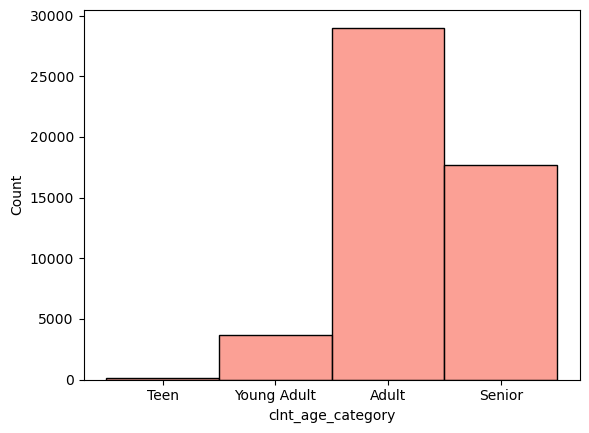

In [38]:
sns.histplot(fd['clnt_age_category'], color="salmon")

In [39]:
#There are more Senior clients than Young Adults and Teens combined, however, most clients are adults between 25 and 55 years old.

In [40]:
#Tenure of clients

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

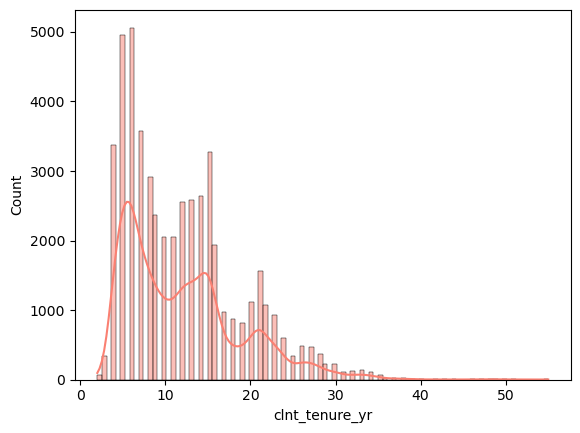

In [41]:
sns.histplot(fd['clnt_tenure_yr'], kde=True, color="salmon")

In [42]:
# Most clients in the experiment are relatively new users (3-8 yers tenure)
#We can see that the graph has a positive skew.

In [43]:
crosstab_result = pd.crosstab(fd['clnt_tenure_yr'], fd['clnt_age_category'])


In [44]:
crosstab_result

clnt_age_category,Teen,Young Adult,Adult,Senior
clnt_tenure_yr,,,,
2.0,0,12,30,19
3.0,5,60,150,122
4.0,48,640,1931,762
5.0,31,760,2903,1256
6.0,4,706,3026,1327
7.0,0,335,2158,1079
8.0,2,174,1851,892
9.0,5,113,1479,767
10.0,0,100,1297,660


In [45]:
fd.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,clnt_age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Adult
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adult
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Adult


In [46]:
pf.basic_stats(fd)

The median is: 65734.33
The skew is: 11.47407650252342
The kurtosis is: 294.1124758573803
Quantile 0.5 is: 65734.33
Quantile 0.75 is: 139958.34999999998
Quantile 0.95 is: 524319.2699999994


In [47]:
fd["balance"].median()

65734.33

<Axes: xlabel='balance', ylabel='Count'>

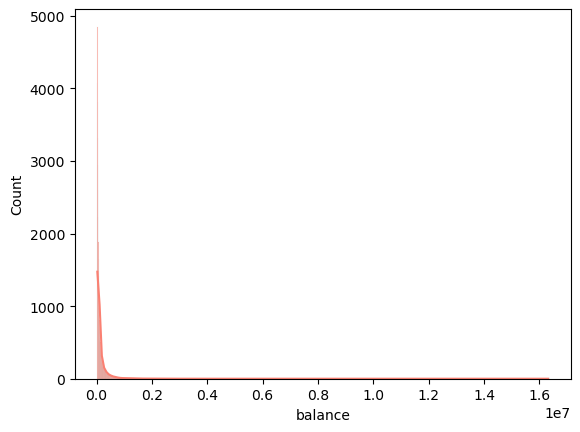

In [48]:
sns.histplot(fd['balance'], kde=True, color="salmon")

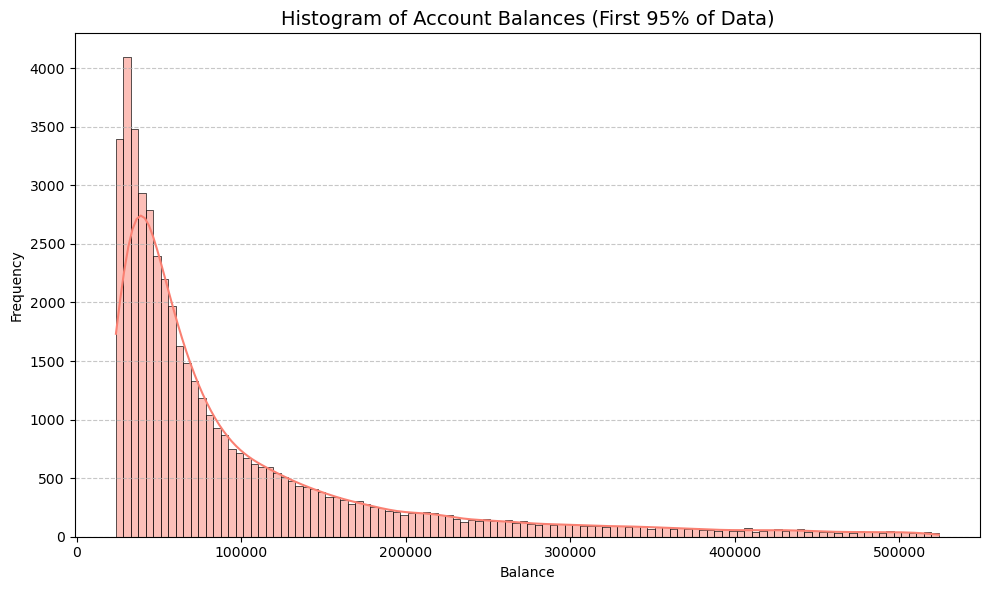

In [49]:
#We're going to exclude the outliers so we can have a more visible chart.
pf.clean_balance_chart(fd)

In [50]:
#As we can see, the average balance is 147.445,24$, and the median balance is 63.332,9$.
#We can see the graph has a huge positive skew (skew value = 11.16) and has a kurtosis of 278.207 (very disperse and many outliers).

In [51]:
fd["balance"].median()

65734.33

In [52]:
fd["balance"].mean()

149516.7943833066

In [53]:
fd.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,clnt_age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Adult
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adult
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Adult


In [54]:
fd["num_accts"].value_counts()

num_accts
2.0    39720
3.0     8947
4.0     1585
5.0      205
6.0       23
7.0        6
1.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

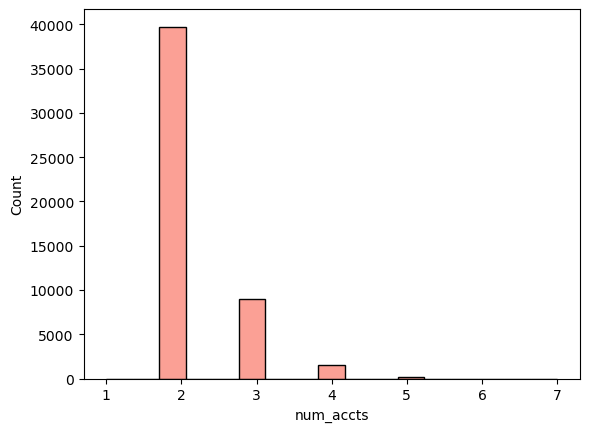

In [55]:
sns.histplot(fd["num_accts"], color="salmon")

In [56]:
fw["client_id"].nunique()

120157

In [57]:
fw.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [58]:
#KPIs

In [59]:
fw

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [60]:
# Merge the two tables on 'client_id'
merged_df = pd.merge(fw, fd[['client_id', 'variation']], on='client_id', how='left')

# View the resulting merged dataframe with the 'variation' column added
merged_df.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [61]:
# Create two separate tables based on the 'variation' column
test_df = merged_df[merged_df['variation'] == 'Test']

print("\nTest Group:")
test_df.head()


Test Group:


,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [62]:
# Create two separate tables based on the 'variation' column
control_df = merged_df[merged_df['variation'] == 'Control']

print("Control Group:")
control_df.head()

Control Group:


,client_id,visitor_id,visit_id,process_step,date_time,variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control


In [63]:
#TEST Group

pf.completion_rate_kpi(test_df)

'The completion rate KPI is: 68.0 %'

In [64]:
#control Group

pf.completion_rate_kpi(control_df)

'The completion rate KPI is: 64.61 %'

In [65]:
#TEST GROUP
pf.time_per_step_kpi(test_df)

,process_step,time_diff
0,confirm,236.237553
1,start,60.574228
2,step_1,60.499003
3,step_2,88.587287
4,step_3,128.966521


In [66]:
#CONTROL GROUP

pf.time_per_step_kpi(control_df)

,process_step,time_diff
0,confirm,153.025992
1,start,62.916908
2,step_1,50.238130
3,step_2,91.588483
4,step_3,135.356545


In [67]:
#TEST GROUP
pf.error_rate_kpi(test_df)

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_5\PROJECT_2\project_functions.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variation_group['process_step'] = pd.Categorical(variation_group['process_step'], categories=step_order, ordered=True)



Total number of errors: 16244
Error Rate: 9.14%


In [68]:
#CONTOL GROUP
pf.error_rate_kpi(control_df)

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_5\PROJECT_2\project_functions.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variation_group['process_step'] = pd.Categorical(variation_group['process_step'], categories=step_order, ordered=True)



Total number of errors: 9610
Error Rate: 6.7%


In [69]:
#KPIs

In [70]:
#TEST GROUP
#COMPLETION RATE: 68%
#STEP_TIME: process_step   time_diff
#0        start   60.555121
#1       step_1   60.499453
#2       step_2   88.585598
#3       step_3  128.953546
#4      confirm  236.237553
#ERROR RATE: 9.14%


In [71]:
#CONTROL GROUP
#COMPLETION RATE: 64.62%
#STEP_TIME: process_step   time_diff
#0        start   62.906464
#1       step_1   50.227453
#2       step_2   91.579342
#3       step_3  135.375146
#4      confirm  153.003307
#ERROR RATE: 6.7%

In [72]:
#As we can see,

#Completion rate is higher in the test group by (aprox. 3.4%)
#STEP time KPI, in average people from test group take longer to arrive to the confirm step (aprox. 80 seconds).
#Error Rate KPI: test group has a higher error rate (aprox 2.5%)

#We can conclude that the new desing's performance is not perfected. 
#We can infer this from the fact that even though it has a higher completion rate,
#clients are more confused and have to go steps back (error rate) 
#and it also takes them more time to complete the whole process (Step time)

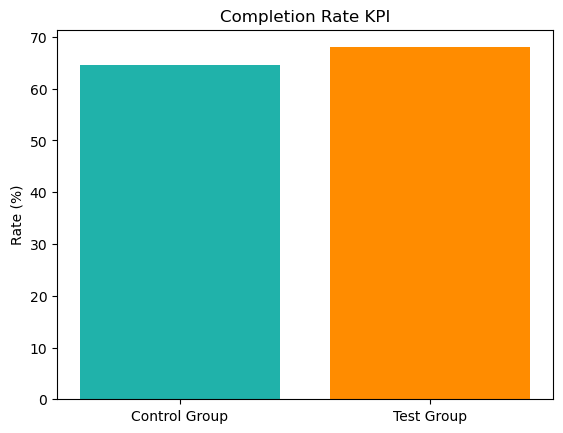

In [73]:
test_completion = 0.68
control_completion = 0.6462

labels = ["Control Group", "Test Group"]
values = [control_completion * 100, test_completion * 100]

plt.bar(labels, values, color=["lightseagreen", "darkorange"])

plt.title("Completion Rate KPI")
plt.ylabel("Rate (%)")

plt.show()

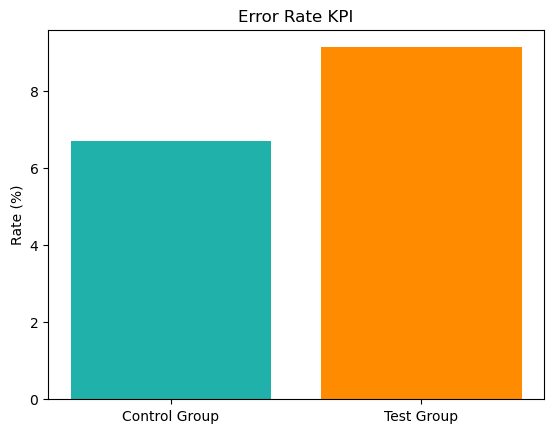

In [74]:
test_errors = 0.0914
control_errors = 0.067

labels = ["Control Group", "Test Group"]
values = [control_errors * 100, test_errors * 100]

plt.bar(labels, values, color=["lightseagreen", "darkorange"])

plt.title("Error Rate KPI")
plt.ylabel("Rate (%)")

plt.show()

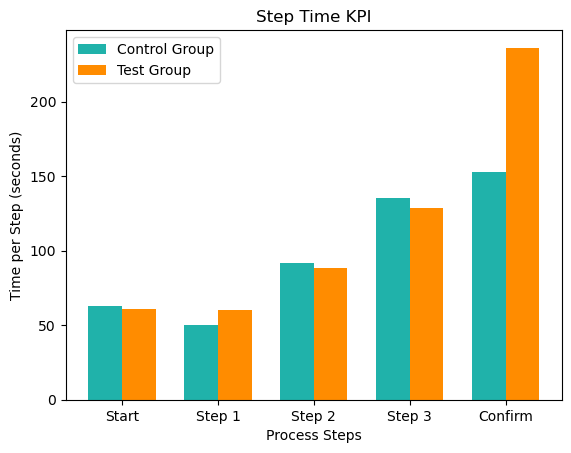

In [75]:
control_group = [62.906464, 50.227453, 91.579342, 135.375146, 153.003307]
test_group = [60.555121, 60.499453, 88.585598, 128.953546, 236.237553]
steps = ["Start", "Step 1", "Step 2", "Step 3", "Confirm"]

x = np.arange(len(steps))  
width = 0.35 

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, control_group, width, label="Control Group", color="lightseagreen")
bars2 = ax.bar(x + width/2, test_group, width, label="Test Group", color="darkorange")

ax.set_xlabel("Process Steps")
ax.set_ylabel("Time per Step (seconds)")
ax.set_title("Step Time KPI")
ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.legend()

plt.show()

In [76]:
control_df["client_id"].nunique()

23526

In [77]:
test_df["client_id"].nunique()

26961

In [78]:
#Hypothesis testing

One interesting hypothesis to test is related to the completion rate between the Test and Control groups. Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

In [79]:
#H0 : Completion rate of the test and control are the same
#H1 : Completion rate of the test and control are different

In [80]:
pf.completion_hypothesis(test_df, control_df)

Stat: 8.022946142982269
We reject the null hypothesis (p-value = 0.00000000000000103239). The completion rates are significantly different between the Test and Control groups.


In [81]:
#H0 : Errors rate of the test and control are the same
#H1 : Errors rate of the test and control are different

In [82]:
pf.error_rate_hypothesis(test_df, control_df)

Stat: 10.080447675922866
We reject the null hypothesis (p-value = 0.000000000000000000000006741825). The error rates are significantly different between the Test and Control groups.


In [83]:
#Another hypothesis checked
#whether the average age of clients engaging with the new process is the same as those engaging with the old process

In [84]:
test_group = fd[fd['variation'] == 'Test']
test_value_counts = test_group['variation'].value_counts()
test_value_counts

variation
Test    26961
Name: count, dtype: int64

In [85]:
# Filter for rows where variation is 'Test' and calculate average age
average_age_test = test_group['clnt_age'].mean()

print(f"The average age of clients in the Control group is: {round(average_age_test, 2)}")

The average age of clients in the Control group is: 47.16


In [86]:
# Filter for rows where variation is 'Test' and calculate std of average age
std_age_test = test_group['clnt_age'].std()

print(f"The std of average age of clients in the Test group is: {round(std_age_test, 2)}")

The std of average age of clients in the Test group is: 15.51


In [87]:
control_group = fd[fd['variation'] == 'Control']
control_value_counts = control_group['variation'].value_counts()
control_value_counts

variation
Control    23526
Name: count, dtype: int64

In [88]:
# Filter for rows where variation is 'Control' and calculate average age
average_age_control = control_group['clnt_age'].mean()

print(f"The average age of clients in the Control group is: {round(average_age_control, 2)}")

The average age of clients in the Control group is: 47.5


In [89]:
# Filter for rows where variation is 'Control' and calculate std of average age
std_age_control = control_group['clnt_age'].std()

print(f"The std of average age of clients in the Control group is: {round(std_age_control, 2)}")

The std of average age of clients in the Control group is: 15.52


In [90]:
#H0 : Average age of the test group and control group is the same
#H1 : Average age of the test and control is different

# Number of users in the Test and Control groups
n_test = test_df["client_id"].nunique()
n_control = control_df["client_id"].nunique()

np.random.seed(0)  # For reproducibility
age_test = np.random.normal(average_age_test, 15.514460681596216, n_test) #using std_age_test calculated above
age_control = np.random.normal(average_age_control, 15.521781263580333, n_control) #using std_age_control calculated above

# Run an independent t-test
stat, p_value = st.ttest_ind(age_test, age_control)

# Set alpha for 5% significance level
alpha = 0.05

# Check the p-value and print the result
if p_value < alpha:
    print(f"We reject the null hypothesis (p-value = {p_value:.10f}). The average age is significantly different between the Test and Control groups.")
else:
    print(f"We fail to reject the null hypothesis (p-value = {p_value:.10f}). No significant difference in average age between the Test and Control groups.")

We reject the null hypothesis (p-value = 0.0281577203). The average age is significantly different between the Test and Control groups.


In [91]:
#We were not convinced that so closed average could be significantly diferent. Therefore we decided to run more tests.
#Levene's Test: More robust to non-normal distributions and tests for equal variances.
#F-Test: Compares variances directly but assumes normality.
#Welch's t-test: If you have evidence of unequal variances.

In [92]:
# Run Levene's test
stat, p_value_levene = st.levene(age_test, age_control)

# Set alpha for 5% significance level
alpha = 0.05

# Check the p-value for Levene's test
if p_value_levene < alpha:
    print(f"We reject the null hypothesis of equal variances (p-value = {p_value_levene:.10f}). The variances are significantly different.")
else:
    print(f"We fail to reject the null hypothesis of equal variances (p-value = {p_value_levene:.10f}). No significant difference in variances.")

We fail to reject the null hypothesis of equal variances (p-value = 0.0514667534). No significant difference in variances.


In [93]:
# Calculate variances
var_test = np.var(age_test, ddof=1)  # Sample variance of test group
var_control = np.var(age_control, ddof=1)  # Sample variance of control group

# Calculate F-statistic
F_statistic = var_test / var_control

# Degrees of freedom
dof_test = n_test - 1
dof_control = n_control - 1

# Calculate p-value from the F-distribution
p_value_f = 1 - st.f.cdf(F_statistic, dof_test, dof_control)

# Set alpha for 5% significance level
alpha = 0.05

# Check the p-value for the F-test
if p_value_f < alpha:
    print(f"We reject the null hypothesis of equal variances (p-value = {p_value_f:.10f}). The variances are significantly different.")
else:
    print(f"We fail to reject the null hypothesis of equal variances (p-value = {p_value_f:.10f}). No significant difference in variances.")

We fail to reject the null hypothesis of equal variances (p-value = 0.9763074467). No significant difference in variances.


In [94]:
# Perform Welch's t-test
stat, p_value_welch = st.ttest_ind(age_test, age_control, equal_var=False)

# Print the result
if p_value_welch < alpha:
    print(f"We reject the null hypothesis (p-value = {p_value_welch:.10f}). The average age is significantly different between the Test and Control groups.")
else:
    print(f"We fail to reject the null hypothesis (p-value = {p_value_welch:.10f}). No significant difference in average age between the Test and Control groups.")

We reject the null hypothesis (p-value = 0.0282919624). The average age is significantly different between the Test and Control groups.


In [95]:
#it is possible to have a significant difference in means (from the t-test) while simultaneously 
#not finding significant differences in variances (from Levene's test or the F-test).

In [96]:
#Welch's test gives you a more reliable test statistic when you're concerned about unequal variances.

In [97]:
#Another hypothesis checked
#You might want to test if the average client tenure

In [98]:
# Filter for rows where variation is 'Test' and calculate average tenure in month
average_tenure_test = fd[fd['variation'] == 'Test']['clnt_tenure_mnth'].mean()
print(f"The average tenure in month of clients in the Test group is: {average_tenure_test}")

# Filter for rows where variation is 'Test' and calculate std of average tenure in month
std_tenure_test = fd[fd['variation'] == 'Test']['clnt_tenure_mnth'].std()
print(f"The std of average tenure in month of clients in the Test group is: {std_tenure_test}")

The average tenure in month of clients in the Test group is: 149.8528986313564
The std of average tenure in month of clients in the Test group is: 81.78338994423311


In [99]:
# Filter for rows where variation is 'Control' and calculate average tenure in month
average_tenure_control = fd[fd['variation'] == 'Control']['clnt_tenure_mnth'].mean()
print(f"The average tenure in month of clients in the Control group is: {average_tenure_control}")

# Filter for rows where variation is 'Control' and calculate std of average tenure in month
std_tenure_control = fd[fd['variation'] == 'Control']['clnt_tenure_mnth'].std()
print(f"The std of average tenure in month of clients in the Control group is: {std_tenure_control}")

The average tenure in month of clients in the Control group is: 151.06210150471819
The std of average tenure in month of clients in the Control group is: 82.1276630628034


In [100]:
#H0 : Average tenures of the test group and control group is the same
#H1 : Average tenures of the test and control is different

# Average tenures


# Number of users in the Test and Control groups
n_test = test_df["client_id"].nunique()
n_control = control_df["client_id"].nunique()

# Generate sample data for t-test
# You could use actual age data if available
np.random.seed(0)  # For reproducibility
tenure_test = np.random.normal(average_tenure_test, std_tenure_test, n_test) #using std_tenure_test calculated above  
tenure_control = np.random.normal(average_tenure_control, std_tenure_control, n_control) #using std_tenure_control calculated above

# Run an independent t-test
stat, p_value = st.ttest_ind(tenure_test, tenure_control)

# Set alpha for 5% significance level
alpha = 0.05

# Check the p-value and print the result
if p_value < alpha:
    print(f"We reject the null hypothesis (p-value = {p_value:.30f}). The average tenure is significantly different between the Test and Control groups.")
else:
    print(f"We fail to reject the null hypothesis (p-value = {p_value:.30f}). No significant difference in average tenure between the Test and Control groups.")

We fail to reject the null hypothesis (p-value = 0.152951840733197785837660376274). No significant difference in average tenure between the Test and Control groups.


In [105]:
########  Experiment Evaluation  ########

#Design Effectiveness:

#- Was the experiment well-structured?
#After analysing the data, 
#we would suggest that the experiment was not well-structured to have a correct comparison between 
#the the control and the test group. 

#Were clients randomly and equally divided between the old and new designs?
#After cleaning the data, we found out that the 2 groups of study (test / control) are quite differents in several aspects:
#group size (n_test = 26961 / n_control = 23526)
#completion rate is significantly different with a p-value = 1.03239e−15
#average client age are significantly different with a p-value = 0.0281577203

#We also found that the client tenure was not different in the study:
#average client tenure are statistically similar with a p-value = 0.0281

#Were there any biases?
#Given these significant differences across several metrics, 
#it suggests that clients were not randomly and equally divided between the old and new designs. 
#Therefore, biases exist, which could affect the validity of any conclusions drawn from comparing the two groups. 
#Addressing these biases, 
#either through proper randomization in future studies or by controlling for these variables in your analysis, 
#would be important for obtaining reliable results.

In [106]:
#Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

#Yes, the timeframe of the experiment from 3/15/2017 to 6/20/2017 was adequate to gather meaningful data and insights.

#However, while the duration itself (about three months) might typically allow for meaningful data collection, 
#the significant differences between the test and control groups suggest that the experimental design was flawed. 
#These biases likely compromised the validity of any conclusions drawn, meaning that even if data was collected, 
#it may not have provided reliable insights. For future studies, addressing the randomization and structural issues 
#would be crucial to ensure that the timeframe can be effectively utilized to gather meaningful results.

In [107]:
fd.to_csv('final_demo.csv', index=False)

In [108]:
fw.to_csv('web_data.csv', index=False)